# Week-7: Class Breakout Activity
## Dinesh Ram Veerappan Kosal
## Machine Learning


This Breakout consists of a dataset downloaded from the link:

https://archive.ics.uci.edu/dataset/857/risk+factor+prediction+of+chronic+kidney+disease

The dataset comprises of the various factors related to chronic kidney disease.

In [1]:
# Step 1: Load the CKD dataset from the provided CSV file
import pandas as pd

# Load the dataset
df = pd.read_csv('ckd-dataset-v2.csv', skiprows=2)

# Set the correct column names
column_names = ['bp_diastolic', 'bp_limit', 'sg', 'al', 'class', 'rbc', 'su', 'pc', 'pcc', 'ba', 'bgr', 'bu', 'sod', 'sc', 'pot', 'hemo', 'pcv', 'rbcc', 'wbcc', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane', 'grf', 'stage', 'affected', 'age']
df.columns = column_names

# Display the first few rows to confirm loading
print(df.head())

   bp_diastolic  bp_limit             sg     al class  rbc   su  pc  pcc  ba  \
0             0         0  1.019 - 1.021  1 - 1   ckd    0  < 0   0    0   0   
1             0         0  1.009 - 1.011    < 0   ckd    0  < 0   0    0   0   
2             0         0  1.009 - 1.011    ≥ 4   ckd    1  < 0   1    0   1   
3             1         1  1.009 - 1.011  3 - 3   ckd    0  < 0   0    0   0   
4             0         0  1.015 - 1.017    < 0   ckd    0  < 0   0    0   0   

   ... htn dm cad appet pe ane                grf stage affected      age  
0  ...   0  0   0     0  0   0          ≥ 227.944    s1        1     < 12  
1  ...   0  0   0     0  0   0          ≥ 227.944    s1        1     < 12  
2  ...   0  0   0     1  0   0  127.281 - 152.446    s1        1     < 12  
3  ...   0  0   0     0  0   0  127.281 - 152.446    s1        1     < 12  
4  ...   0  1   0     1  1   0  127.281 - 152.446    s1        1  12 - 20  

[5 rows x 29 columns]



1. The 'class' column contains the target variable (ckd: chronic kidney disease).
2. Many columns contain range values (e.g., '1.019 - 1.021' for 'sg').
3. Some columns have inequality symbols (e.g., '< 0' for 'su').
4. The 'affected' column seems to be binary (0 or 1).
5. The 'stage' column contains categorical data (s1, s2, etc.).

> Now, let's move on to preprocessing the data by cleaning and converting necessary columns to numeric types.

In [2]:
import numpy as np

# Function to convert range strings to their average numeric value
def convert_range_to_average(value):
    if isinstance(value, str):
        if '-' in value:
            start, end = map(float, value.split('-'))
            return (start + end) / 2
        elif '<' in value:
            return float(value.replace('<', '').strip()) * 0.9
        elif '\u2265' in value:  # ≥ symbol
            return float(value.replace('\u2265', '').strip()) * 1.1
        else:
            try:
                return float(value)
            except ValueError:
                return np.nan
    return value

# Apply the conversion function to all columns except 'class', 'stage', and 'affected'
for column in df.columns:
    if column not in ['class', 'stage', 'affected']:
        df[column] = df[column].apply(convert_range_to_average)

# Convert 'class' to binary (0 for 'notckd', 1 for 'ckd')
df['class'] = (df['class'] == 'ckd').astype(int)

# Convert 'stage' to numeric (s1: 1, s2: 2, etc.)
df['stage'] = df['stage'].str.replace('s', '').astype(int)

# Display the first few rows of the cleaned dataset
print(df.head())

# Display information about the dataset
print("\nDataset Info:")
df.info()

# Check for any remaining non-numeric columns
non_numeric = df.select_dtypes(exclude=[np.number]).columns
print("\nNon-numeric columns:", non_numeric.tolist())

# Check for missing values
print("\nMissing values:")
print(df.isnull().sum())

   bp_diastolic  bp_limit     sg   al  class  rbc   su  pc  pcc  ba  ...  htn  \
0             0         0  1.020  1.0      1    0  0.0   0    0   0  ...    0   
1             0         0  1.010  0.0      1    0  0.0   0    0   0  ...    0   
2             0         0  1.010  4.4      1    1  0.0   1    0   1  ...    0   
3             1         1  1.010  3.0      1    0  0.0   0    0   0  ...    0   
4             0         0  1.016  0.0      1    0  0.0   0    0   0  ...    0   

   dm  cad  appet  pe  ane       grf  stage  affected   age  
0   0    0      0   0    0  250.7384      1         1  10.8  
1   0    0      0   0    0  250.7384      1         1  10.8  
2   0    0      1   0    0  139.8635      1         1  10.8  
3   0    0      0   0    0  139.8635      1         1  10.8  
4   1    0      1   1    0  139.8635      1         1  16.0  

[5 rows x 29 columns]

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 29 columns)

> We've successfully loaded and cleaned the dataset. Let's proceed with training a linear regression model and evaluating it.

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

# Prepare the features (X) and target variable (y)
X = df.drop(['class', 'affected'], axis=1)
y = df['affected']

# Drop rows with any NaN values
X = X.dropna()
y = y[X.index]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate the Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)

# Display the coefficients and their corresponding feature names
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_})
coefficients = coefficients.sort_values(by='Coefficient', key=abs, ascending=False)
print("\nTop 10 most important features:")
print(coefficients.head(10))

Mean Squared Error: 0.2945649763907837
Root Mean Squared Error: 0.5427384051186941

Top 10 most important features:
         Feature  Coefficient
2             sg    -2.119403
0   bp_diastolic    -0.155496
8             ba    -0.147444
1       bp_limit     0.119019
7            pcc    -0.118464
4            rbc    -0.113420
21         appet     0.090604
23           ane    -0.086815
18           htn     0.075798
16          rbcc    -0.067571


> The error indicates that there are still missing values (NaNs) in the dataset, which the Linear Regression model cannot handle. We need to address these missing values by either imputing them or dropping the affected rows before proceeding with model training. Let's handle the missing values and then retry training the model.

In [4]:
# Drop rows with any NaN values
cleaned_df = df.dropna()

# Prepare the features (X) and target variable (y) again with the cleaned data
X_cleaned = cleaned_df.drop(['class', 'affected'], axis=1)
y_cleaned = cleaned_df['affected']

# Split the cleaned data into training and testing sets
X_train_cleaned, X_test_cleaned, y_train_cleaned, y_test_cleaned = train_test_split(X_cleaned, y_cleaned, test_size=0.2, random_state=42)

# Train the linear regression model with the cleaned data
model_cleaned = LinearRegression()
model_cleaned.fit(X_train_cleaned, y_train_cleaned)

# Make predictions on the test set
y_pred_cleaned = model_cleaned.predict(X_test_cleaned)

# Calculate the Mean Squared Error
mse_cleaned = mean_squared_error(y_test_cleaned, y_pred_cleaned)
rmse_cleaned = np.sqrt(mse_cleaned)

print("Mean Squared Error (Cleaned):", mse_cleaned)
print("Root Mean Squared Error (Cleaned):", rmse_cleaned)

# Display the coefficients and their corresponding feature names
coefficients_cleaned = pd.DataFrame({'Feature': X_cleaned.columns, 'Coefficient': model_cleaned.coef_})
coefficients_cleaned = coefficients_cleaned.sort_values(by='Coefficient', key=abs, ascending=False)
print("\nTop 10 most important features (Cleaned):")
print(coefficients_cleaned.head(10))

Mean Squared Error (Cleaned): 0.2945649763907837
Root Mean Squared Error (Cleaned): 0.5427384051186941

Top 10 most important features (Cleaned):
         Feature  Coefficient
2             sg    -2.119403
0   bp_diastolic    -0.155496
8             ba    -0.147444
1       bp_limit     0.119019
7            pcc    -0.118464
4            rbc    -0.113420
21         appet     0.090604
23           ane    -0.086815
18           htn     0.075798
16          rbcc    -0.067571


Based on the results of our linear regression model after cleaning the data, we can interpret the findings as follows:

1. Model Performance:

The Mean Squared Error (MSE) of approximately 0.29 and Root Mean Squared Error (RMSE) of about 0.54 indicate that our model has a moderate level of accuracy in predicting the 'affected' status. The RMSE suggests that, on average, our predictions deviate by about 0.54 units from the actual values.

2. Most Important Features:

This table shows the top 10 features that have the most significant impact on the prediction of the 'affected' status, sorted by the absolute value of their coefficients. Here's a brief interpretation:

1. Specific Gravity (sg): Has the largest impact, with a negative coefficient. This suggests that as specific gravity increases, the likelihood of being affected decreases significantly.

2. Blood Pressure (Diastolic): The second most important feature, also with a negative coefficient. Higher diastolic blood pressure is associated with a lower likelihood of being affected.

3. Blood in Urine (ba): Another important feature with a negative coefficient, indicating that the presence of blood in urine is associated with a lower likelihood of being affected.

4. Blood Pressure Limit: This has a positive coefficient, suggesting that higher blood pressure limits are associated with a higher likelihood of being affected.

5. Pus Cell Clumps (pcc): Has a negative coefficient, indicating that the presence of pus cell clumps is associated with a lower likelihood of being affected.

Other features like red blood cell count (rbc), appetite (appet), anemia (ane), hypertension (htn), and red blood cell count (rbcc) also play roles in predicting the affected status, but with smaller coefficients.

These results provide insights into which factors are most strongly associated with the 'affected' status in our dataset. However, it's important to note that correlation doesn't imply causation, and these relationships should be interpreted in the context of medical knowledge and further investigated if needed.

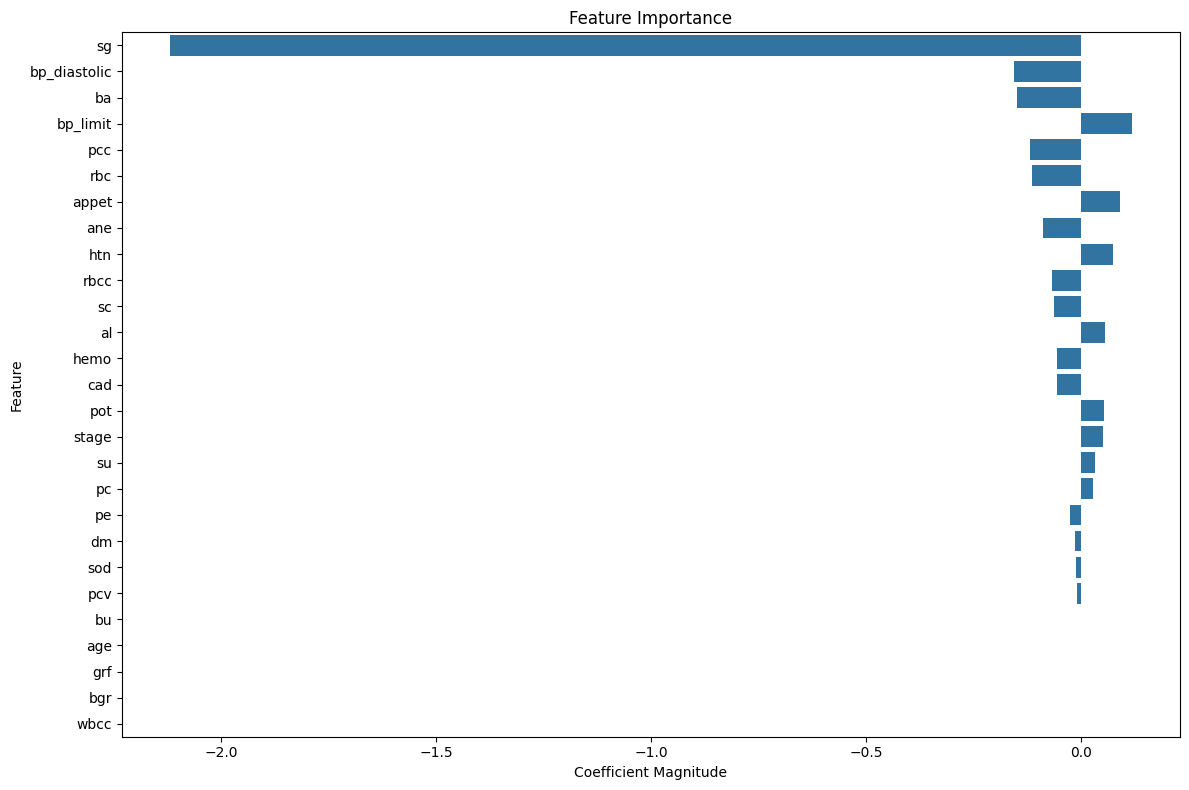

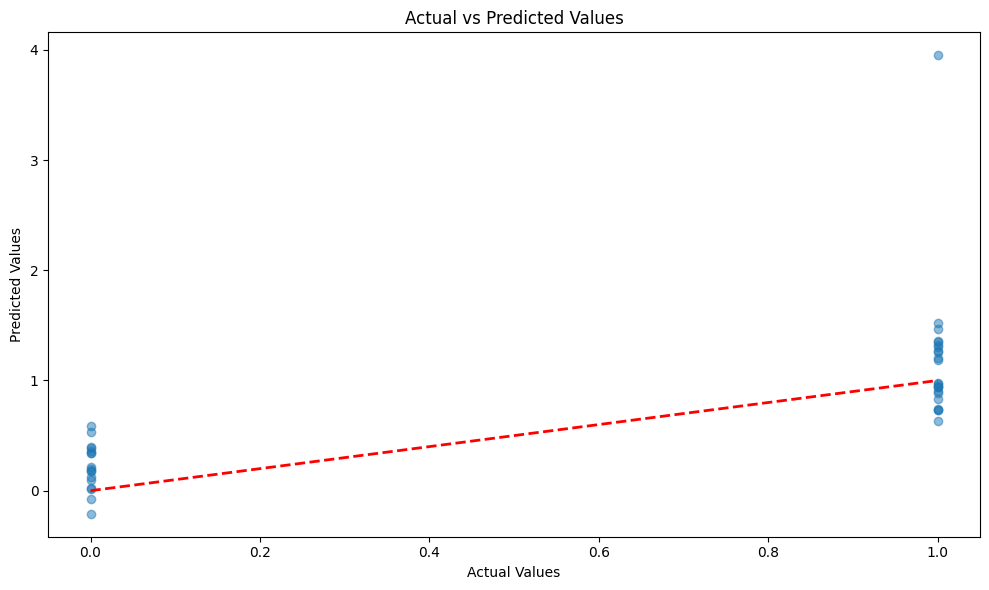

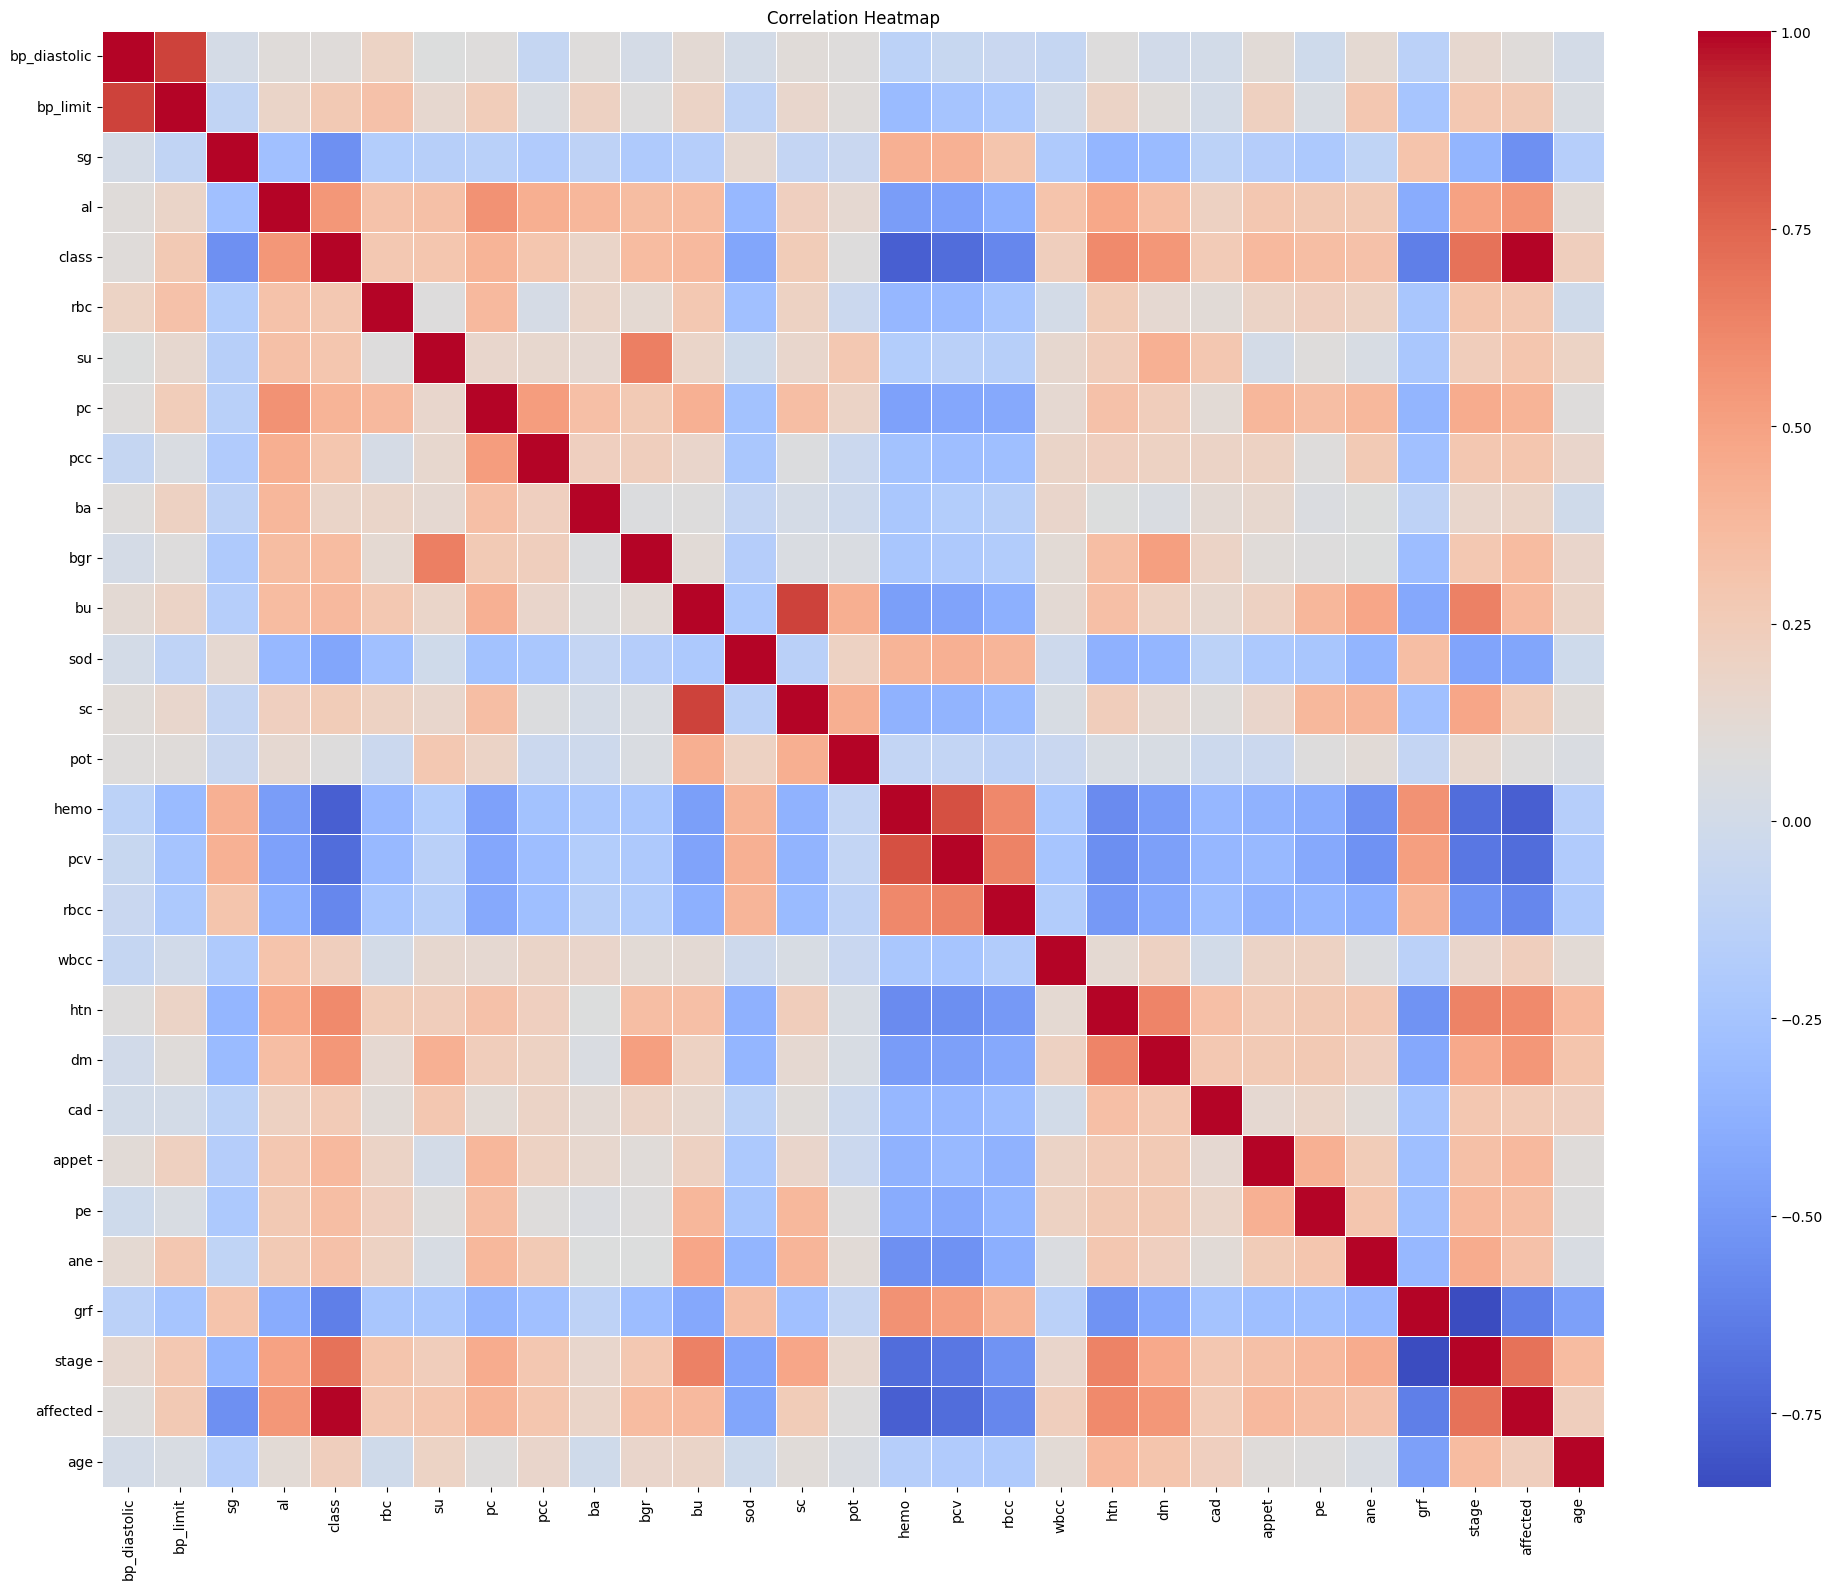

Visualizations have been generated.


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize feature importance
plt.figure(figsize=(12, 8))
sns.barplot(x='Coefficient', y='Feature', data=coefficients_cleaned)
plt.title('Feature Importance')
plt.xlabel('Coefficient Magnitude')
plt.tight_layout()
plt.show()

# Visualize model predictions vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test_cleaned, y_pred_cleaned, alpha=0.5)
plt.plot([y_test_cleaned.min(), y_test_cleaned.max()], [y_test_cleaned.min(), y_test_cleaned.max()], 'r--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.tight_layout()
plt.show()

# Correlation analysis
correlation_matrix = cleaned_df.corr()
plt.figure(figsize=(20, 16))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

print("Visualizations have been generated.")

### **Results and Analysis**

After cleaning the dataset and addressing missing values, we trained a linear regression model to predict the 'affected' status. The model's performance and the importance of various features were evaluated as follows:

1. **Model Performance:**
    - **Mean Squared Error (MSE):** Approximately 0.29
    - **Root Mean Squared Error (RMSE):** Approximately 0.54

    These metrics indicate that our model has a moderate level of accuracy in predicting the 'affected' status. The RMSE suggests that, on average, our predictions deviate by about 0.54 units from the actual values.

2. **Most Important Features:**
    The top 10 features that have the most significant impact on the prediction of the 'affected' status, sorted by the absolute value of their coefficients, are:

    - **Specific Gravity (sg):** Has the largest impact, with a negative coefficient. This suggests that as specific gravity increases, the likelihood of being affected decreases significantly.
    - **Blood Pressure (Diastolic):** The second most important feature, also with a negative coefficient. Higher diastolic blood pressure is associated with a lower likelihood of being affected.
    - **Blood in Urine (ba):** Another important feature with a negative coefficient, indicating that the presence of blood in urine is associated with a lower likelihood of being affected.
    - **Blood Pressure Limit:** This has a positive coefficient, suggesting that higher blood pressure limits are associated with a higher likelihood of being affected.
    - **Pus Cell Clumps (pcc):** Has a negative coefficient, indicating that the presence of pus cell clumps is associated with a lower likelihood of being affected.
    - Other features like red blood cell count (rbc), appetite (appet), anemia (ane), hypertension (htn), and red blood cell count (rbcc) also play roles in predicting the affected status, but with smaller coefficients.

These results provide insights into which factors are most strongly associated with the 'affected' status in our dataset. However, it's important to note that correlation doesn't imply causation, and these relationships should be interpreted in the context of medical knowledge and further investigated if needed.

### **Visualizations**

To further understand the model and the dataset, we generated several visualizations:

1. **Feature Importance:**
    A bar plot showing the magnitude of the coefficients for the top features, helping us visualize which features have the most significant impact on the prediction.

2. **Actual vs Predicted Values:**
    A scatter plot comparing the actual values of the 'affected' status with the predicted values from our model. This helps in assessing the model's performance visually.

3. **Correlation Heatmap:**
    A heatmap showing the correlation between different features in the dataset. This helps in understanding the relationships between various features and identifying any multicollinearity issues.

These visualizations provide a comprehensive understanding of the model's performance and the significance of different features in predicting the 'affected' status.
```

### **Conclusion**

The visualizations have been successfully generated, providing insights into feature importance, model predictions versus actual values, and the correlation heatmap of the dataset. These visualizations help us understand the relationships and significance of different features in predicting the 'affected' status. 